# Initializing and Importing data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("BHP.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


This data was updated 5 years ago(now it is 2023)

## Data analysis and cleaning

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


"Society" column has alot of missing values, bath balcon and price are numrical values others seem categorical.

In [4]:
(data.isnull().sum()/len(data))*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

As we can see that more than 40% of data is missing from society column, we shall drop that

In [5]:
for column in data.columns:
    print("*"*30)
    print(data[column].value_counts())
print("*"*30)

******************************
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
******************************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
******************************
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
**

We shall drop some of the columns that are not necessary to the model

In [6]:
dataC = data[[col for col in data.columns if col not in ['society','availability', 'area_type']]]

In [7]:
dataC.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


we have 40 bathroom house!!

In [8]:
dataC["location"].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [9]:
# we have 1 location missing, we can fill it with Sarjapur  Road
dataC.loc[:, 'location'] = dataC.loc[:, 'location'].fillna("Sarjapur  Road")

C:\Users\AfY\AppData\Local\Temp\ipykernel_21856\3484251000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataC.loc[:, 'location'] = dataC.loc[:, 'location'].fillna("Sarjapur  Road")


In [10]:
dataC['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [11]:
#fill missing values with 2 BHK
dataC.loc[:, 'size'] = dataC.loc[:, 'size'].fillna("2 BHK")

C:\Users\AfY\AppData\Local\Temp\ipykernel_21856\2729644700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataC.loc[:, 'size'] = dataC.loc[:, 'size'].fillna("2 BHK")


In [12]:
dataC['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [13]:
#the null values in balcony might not have no balcony
dataC.loc[:, 'balcony'] = dataC.loc[:, 'balcony'].fillna(0.0)

C:\Users\AfY\AppData\Local\Temp\ipykernel_21856\1986619545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataC.loc[:, 'balcony'] = dataC.loc[:, 'balcony'].fillna(0.0)


In [14]:
#replace null values in bathroom  column to the meadian value 
dataC.loc[:, 'bath'] = dataC.loc[:, 'bath'].fillna(dataC['bath'].median())

C:\Users\AfY\AppData\Local\Temp\ipykernel_21856\1671845151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataC.loc[:, 'bath'] = dataC.loc[:, 'bath'].fillna(dataC['bath'].median())


In [15]:
(dataC.isnull().sum()/len(data))*100

location      0.0
size          0.0
total_sqft    0.0
bath          0.0
balcony       0.0
price         0.0
dtype: float64

We have eliminated missing values

Now let us clear te conflict of BHK and bedroom in column size, convert it into integer values

In [16]:
dataC["BHK"] = dataC["size"].str.split().str.get(0).astype(int)

C:\Users\AfY\AppData\Local\Temp\ipykernel_21856\1069768513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataC["BHK"] = dataC["size"].str.split().str.get(0).astype(int)


In [17]:
dataC[dataC['BHK']>15].value_counts()

location                       size        total_sqft  bath  balcony  price  BHK
1Hanuman Nagar                 19 BHK      2000        16.0  0.0      490.0  19     1
1Kasavanhalli                  18 Bedroom  1200        18.0  0.0      200.0  18     1
2Electronic City Phase II      27 BHK      8000        27.0  0.0      230.0  27     1
Koramangala Industrial Layout  16 BHK      10000       16.0  0.0      550.0  16     1
Munnekollal                    43 Bedroom  2400        40.0  0.0      660.0  43     1
dtype: int64

In [18]:
dataC['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

we can see some of them are in ranges, let's convert them into thier mean

In [19]:
def convertRange_to_mean(x):
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0])+ float(temp[1]))/2
    try:# incase of error
        return float(x)
    except:
        return None

In [20]:
dataC["total_sqft"] = dataC["total_sqft"].apply(convertRange_to_mean)

C:\Users\AfY\AppData\Local\Temp\ipykernel_21856\873593117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataC["total_sqft"] = dataC["total_sqft"].apply(convertRange_to_mean)


In [21]:
#dropping size column
dataC.drop(columns = ['size'], inplace=True)
dataC.head()

C:\Users\AfY\AppData\Local\Temp\ipykernel_21856\335486359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataC.drop(columns = ['size'], inplace=True)


,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


### Price Per Square feet
One of the important parameters while making property purchase is Price Per Square feet, adding that

In [22]:
#price is in terms of lakh
dataC.loc[:,'price_per_sqft'] = dataC['price']*100000//dataC['total_sqft']

C:\Users\AfY\AppData\Local\Temp\ipykernel_21856\624429733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataC.loc[:,'price_per_sqft'] = dataC['price']*100000//dataC['total_sqft']


In [23]:
dataC.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,1.511937,112.565627,2.802778,7.907078e+03
std,1238.405258,1.338754,0.864240,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.266250e+03
50%,1276.000000,2.000000,2.000000,72.000000,3.000000,5.433500e+03
75%,1680.000000,3.000000,2.000000,120.000000,3.000000,7.311000e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


In [24]:
dataC['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    400
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [25]:
unique_counts = dataC['location'].value_counts()
filtered_data = dataC[dataC['location'].isin(unique_counts[unique_counts <=10 ].index)]
filtered_data

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
9,Gandhi Bazar,1020.0,6.0,0.0,370.00,6,36274.0
18,Ramakrishnappa Layout,2770.0,4.0,2.0,290.00,3,10469.0
19,Manayata Tech Park,1100.0,2.0,2.0,48.00,2,4363.0
24,Thanisandra,510.0,1.0,0.0,25.25,1,4950.0
25,Mangammanapalya,1250.0,3.0,2.0,56.00,3,4480.0
...,...,...,...,...,...,...,...
13291,Weavers Colony,812.0,1.0,0.0,26.00,1,3201.0
13292,Udayapur Village,1440.0,2.0,2.0,63.93,3,4439.0
13302,Annaiah Reddy Layout,1075.0,2.0,2.0,48.00,2,4465.0
13306,Rajarajeshwari Nagara,1200.0,5.0,0.0,325.00,4,27083.0


In [26]:
dataC["location"] = dataC['location'].apply(lambda x: x.strip())
location_counts = dataC['location'].value_counts()

C:\Users\AfY\AppData\Local\Temp\ipykernel_21856\2126348015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataC["location"] = dataC['location'].apply(lambda x: x.strip())


In [27]:
#let us see how many places have been repeated less han 7 times 
location_count_7_less = location_counts[location_counts <= 7]
location_count_7_less

Victoria Layout                   7
Vijaya Bank Layout                7
Jeevan bima nagar                 7
Hessarghatta                      7
Richards Town                     7
                                 ..
Bapuji Layout                     1
1st Stage Radha Krishna Layout    1
BEML Layout 5th stage             1
singapura paradise                1
Abshot Layout                     1
Name: location, Length: 985, dtype: int64

In [28]:
#changing all the locations that occur less than 8 times into other
dataC['location'] = dataC['location'].apply(lambda x : 'other' if x in location_count_7_less else x)

C:\Users\AfY\AppData\Local\Temp\ipykernel_21856\2738695281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataC['location'] = dataC['location'].apply(lambda x : 'other' if x in location_count_7_less else x)


In [29]:
dataC['location'].value_counts()

other              2294
Whitefield          541
Sarjapur  Road      400
Electronic City     304
Kanakpura Road      273
                   ... 
Nelamangala           8
Kodbisanhalli         8
Hongasandra           8
Huskur                8
Shanti Nagar          8
Name: location, Length: 310, dtype: int64

Now let us see if there are outliers

In [30]:
dataC.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,1.511937,112.565627,2.802778,7.907078e+03
std,1238.405258,1.338754,0.864240,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.266250e+03
50%,1276.000000,2.000000,2.000000,72.000000,3.000000,5.433500e+03
75%,1680.000000,3.000000,2.000000,120.000000,3.000000,7.311000e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


In [31]:
# we can see flase data like the min value of total_sqft of 1
(dataC['total_sqft']/dataC['BHK']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [32]:
#removing values where 'total_sqft' per 'BHK' less than 300, sincew it is not fesible
dataC = dataC[((dataC['total_sqft']/dataC['BHK']) >= 300)]
dataC.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,1.522267,111.382401,2.650838,6303.551476
std,1261.271296,1.077938,0.852536,152.077329,0.976678,4162.242220
min,300.000000,1.000000,0.000000,8.440000,1.000000,267.000000
25%,1116.000000,2.000000,1.000000,49.000000,2.000000,4210.000000
50%,1300.000000,2.000000,2.000000,70.000000,3.000000,5294.000000
75%,1700.000000,3.000000,2.000000,115.000000,3.000000,6916.000000
max,52272.000000,16.000000,3.000000,3600.000000,16.000000,176470.000000


In [33]:
dataC.shape

(12530, 7)

In [34]:
dataC.price_per_sqft.describe()

count     12530.000000
mean       6303.551476
std        4162.242220
min         267.000000
25%        4210.000000
50%        5294.000000
75%        6916.000000
max      176470.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

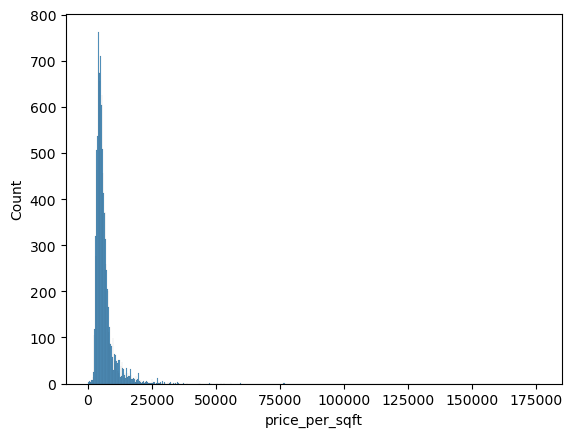

In [35]:
sns.histplot(dataC, x=dataC.price_per_sqft )

In [36]:
def remove_outliers_sqft(dF):
    dF_output = pd.DataFrame()
    for key, subdF in dF.groupby('location'):
        meam = np.mean(subdF.price_per_sqft)
        stdev = np.std(subdF.price_per_sqft)
        gen_dF = subdF[(subdF.price_per_sqft > (meam - (stdev))) & (subdF.price_per_sqft <= (meam + (stdev)))]
        dF_output = pd.concat([dF_output,gen_dF], ignore_index= True)
    return dF_output

dataC = remove_outliers_sqft(dataC)
dataC.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,10204.000000,10204.000000,10204.000000,10204.000000,10204.000000,10204.000000
mean,1513.671374,2.474128,1.535966,92.819445,2.577323,5683.833693
std,903.376875,0.989416,0.836291,98.093894,0.902260,2352.566229
min,300.000000,1.000000,0.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,1.000000,49.000000,2.000000,4250.000000
50%,1290.000000,2.000000,2.000000,67.000000,2.000000,5177.500000
75%,1650.000000,3.000000,2.000000,100.000000,3.000000,6428.000000
max,30400.000000,16.000000,3.000000,2200.000000,16.000000,28322.000000


In [37]:
def BHK_outlier_remover(df):
    exclude_indices = np.array([])
    # groupby location
    for location, location_df in df.groupby("location"):
        BHK_stats = {}
        # groupby BHK
        for BHK, BHK_df in location_df.groupby('BHK'):
            BHK_stats[BHK] ={
                'Mean' : np.mean(BHK_df.price_per_sqft),
                'STD' : np.std(BHK_df.price_per_sqft),
                'Count' : BHK_df.shape[0]
            }
            for BHK, BHK_df in location_df.groupby('BHK'):
                stats = BHK_stats.get(BHK-1)
                #if 3BHK price per sqft < 2 BHK mean, keep it or drop that row
                if stats and stats['Count'] >5:
                    exclude_indices = np.append(exclude_indices, BHK_df[BHK_df.price_per_sqft<(stats['Mean'])].index.values)
        return df.drop(exclude_indices, axis = 'index')

In [38]:
dataC = BHK_outlier_remover(dataC)

In [39]:
dataC.shape

(10204, 7)

In [40]:
dataC

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,1st Block HRBR Layout,2300.0,3.0,0.0,80.00,3,3478.0
1,1st Block HRBR Layout,1250.0,2.0,1.0,67.00,2,5360.0
2,1st Block Jayanagar,2850.0,4.0,1.0,428.00,4,15017.0
3,1st Block Jayanagar,1630.0,3.0,2.0,194.00,3,11901.0
4,1st Block Jayanagar,1875.0,2.0,3.0,235.00,3,12533.0
...,...,...,...,...,...,...,...
10199,other,1353.0,2.0,2.0,110.00,2,8130.0
10200,other,812.0,1.0,0.0,26.00,1,3201.0
10201,other,1440.0,2.0,2.0,63.93,3,4439.0
10202,other,1075.0,2.0,2.0,48.00,2,4465.0


In [41]:
#removing price per sqft column, since it was used only for cleaning

<Axes: xlabel='price_per_sqft', ylabel='Count'>

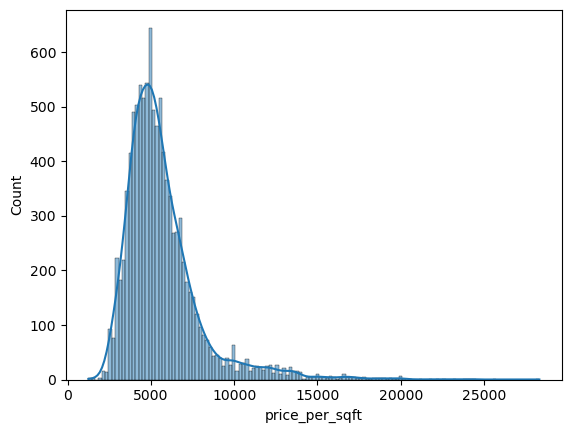

In [42]:
sns.histplot(dataC, x=dataC.price_per_sqft ,kde=True)

In [43]:
dataC.drop(columns = ['price_per_sqft'], inplace = True)

#### Cleaned Data

In [44]:
dataC.head()

,location,total_sqft,bath,balcony,price,BHK
0,1st Block HRBR Layout,2300.0,3.0,0.0,80.0,3
1,1st Block HRBR Layout,1250.0,2.0,1.0,67.0,2
2,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
3,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
4,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3


In [45]:
data.to_csv("cleaned_data.csv")

# Regression, Lasso, Ridge

In [46]:
X = dataC.drop(columns = ['price'])
y = dataC['price']

### Importing 

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =0)

In [49]:
print(X_train.shape)
print(X_test.shape)

(7142, 5)
(3062, 5)


#### Applying Linear Regression

In [50]:
combined_data = pd.concat([X_train, X_test])
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['location']), remainder='passthrough')

In [51]:
column_trans.fit(combined_data)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['location'])])

In [52]:
X_train_transformed = column_trans.transform(X_train)
X_test_transformed = column_trans.transform(X_test)

In [53]:
scaler = StandardScaler(with_mean=False)

In [54]:
lr = LinearRegression()

In [55]:
pipe = make_pipeline(scaler, lr)

In [56]:
pipe.fit(X_train_transformed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [57]:
y_pred_lr = pipe.predict(X_test_transformed)

In [58]:
print(lr.intercept_)

-13.931327265267527


C:\Users\AfY\AppData\Local\Temp\ipykernel_21856\402917321.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred_lr),bins=50);


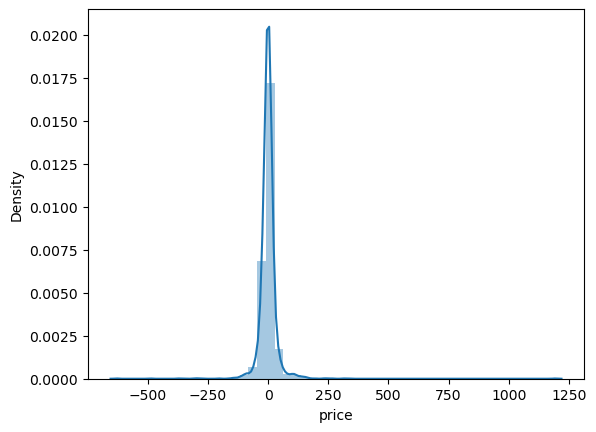

In [59]:
sns.distplot((y_test-y_pred_lr),bins=50);

In [60]:
from sklearn import metrics

In [61]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

MAE: 19.2508793055759
MSE: 1756.2211339043306
RMSE: 41.90729213280584


In [62]:
r2_score(y_test,y_pred_lr)

0.7828879673350905

#### Applying Lasso

In [63]:
lasso = Lasso()

In [64]:
pipe = make_pipeline(column_trans,scaler, lasso)

In [66]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('lasso', Lasso())])

In [67]:
y_pred_lasso = pipe.predict(X_test)
r2_score(y_test, y_pred_lasso)

0.7700640974054033

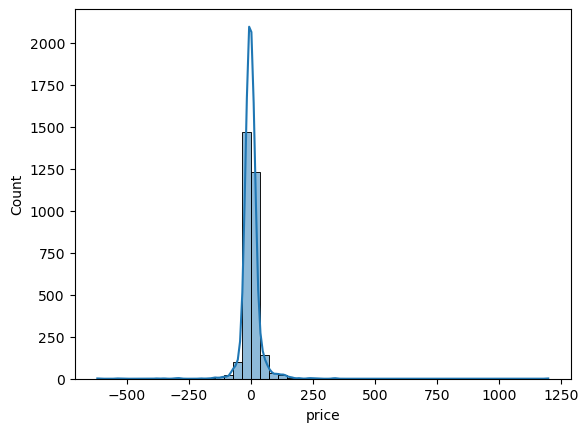

In [68]:
sns.histplot((y_test-y_pred_lasso),bins=50,kde=True);

In [69]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_lasso))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))

MAE: 20.54947192270463
MSE: 1859.953530089468
RMSE: 43.12717855470571


#### Applying Ridge

In [70]:
ridge = Ridge()

In [71]:
pipe = make_pipeline(column_trans, scaler, ridge)

In [72]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('ridge', Ridge())])

In [73]:
y_pred_ridge = pipe.predict(X_test)
r2_score(y_test,y_pred_ridge)

0.7829201354292498

In [74]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_ridge))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))

MAE: 19.249649936741466
MSE: 1755.960925908917
RMSE: 41.90418745076579


In [75]:
print("linear Regression : ", r2_score(y_test,y_pred_lr))
print("Lasso Regression  : ", r2_score(y_test,y_pred_lasso))
print("Ridge  Regression : ", r2_score(y_test,y_pred_ridge))

linear Regression :  0.7828879673350905
Lasso Regression  :  0.7700640974054033
Ridge  Regression :  0.7829201354292498


Ridge Regression and linear regresion shows almost same r2 score, continuing with Ridge

In [76]:
import pickle

In [77]:
pickle.dump(pipe,open('RidgeModel.pkl','wb'))